### Project Brief: Analyzing Booking Data for Splendor Hotel Groups (SHG)
Greetings from Splendor Hotel Groups (SHG). As a recently recruited Business Intelligence
Analyst and Data Analyst, you will be essential to our efforts to solve the puzzles buried in our
booking data. Renowned hospitality company SHG aims to improve visitor experiences and
streamline corporate processes by utilizing data-driven insights. Your task is to thoroughly
examine one of our best resorts' past booking data in order to identify trends, comprehend
consumer behavior, and offer useful suggestions for tactical decision-making.

### Project Overview:
Your task involves a thorough analysis of a comprehensive dataset, featuring intricate details of
bookings, guest demographics, distribution channels, and financial metrics. By applying your
analytical prowess, we aim to extract meaningful insights that will not only inform operational
improvements but also contribute to the overall success of SHG in delivering unparalleled
hospitality.

#### Data cleaning process

In [1]:
#installing required packages
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
%matplotlib inline


In [2]:
shg = pd.read_excel("D:\\Programming\\Datasets\\SHG_Booking_Data (1).xlsx")
shg.head()

,Booking ID,Hotel,Booking Date,Arrival Date,Lead Time,Nights,Guests,Distribution Channel,Customer Type,Country,Deposit Type,Avg Daily Rate,Status,Status Update,Cancelled (0/1),Revenue,Revenue Loss
0,1,Resort,2014-07-24,2015-07-01,342,0,2,Direct,Transient,Portugal,No Deposit,0.0,Check-Out,2015-07-01,0,0.0,0.0
1,2,Resort,2013-06-24,2015-07-01,737,0,2,Direct,Transient,Portugal,No Deposit,0.0,Check-Out,2015-07-01,0,0.0,0.0
2,3,Resort,2015-06-24,2015-07-01,7,1,1,Direct,Transient,United Kingdom,No Deposit,75.0,Check-Out,2015-07-02,0,75.0,0.0
3,4,Resort,2015-06-18,2015-07-01,13,1,1,Corporate,Transient,United Kingdom,No Deposit,75.0,Check-Out,2015-07-02,0,75.0,0.0
4,5,Resort,2015-06-17,2015-07-01,14,2,2,Online Travel Agent,Transient,United Kingdom,No Deposit,98.0,Check-Out,2015-07-03,0,196.0,0.0


In [3]:
shg.shape

(119390, 17)

In [4]:
#data info
shg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 17 columns):
 #   Column                Non-Null Count   Dtype         
---  ------                --------------   -----         
 0   Booking ID            119390 non-null  int64         
 1   Hotel                 119390 non-null  object        
 2   Booking Date          119390 non-null  datetime64[ns]
 3   Arrival Date          119390 non-null  datetime64[ns]
 4   Lead Time             119390 non-null  int64         
 5   Nights                119390 non-null  int64         
 6   Guests                119390 non-null  int64         
 7   Distribution Channel  119390 non-null  object        
 8   Customer Type         119390 non-null  object        
 9   Country               118902 non-null  object        
 10  Deposit Type          119390 non-null  object        
 11  Avg Daily Rate        119390 non-null  float64       
 12  Status                119390 non-null  object        
 13 

#### Data Structure and Types

In [5]:
#Data structure and type
shg.dtypes

Booking ID                       int64
Hotel                           object
Booking Date            datetime64[ns]
Arrival Date            datetime64[ns]
Lead Time                        int64
Nights                           int64
Guests                           int64
Distribution Channel            object
Customer Type                   object
Country                         object
Deposit Type                    object
Avg Daily Rate                 float64
Status                          object
Status Update           datetime64[ns]
Cancelled (0/1)                  int64
Revenue                        float64
Revenue Loss                   float64
dtype: object

In [6]:
#converting Canceleted column from interger to boolen
shg["Cancelled (0/1)"] = shg["Cancelled (0/1)"].astype(bool)

In [7]:
#checking for changes
shg["Cancelled (0/1)"].dtype

dtype('bool')

#### Handling Missing Values 

In [8]:
#checking for missing values
shg.isna().sum()

Booking ID                0
Hotel                     0
Booking Date              0
Arrival Date              0
Lead Time                 0
Nights                    0
Guests                    0
Distribution Channel      0
Customer Type             0
Country                 488
Deposit Type              0
Avg Daily Rate            0
Status                    0
Status Update             0
Cancelled (0/1)           0
Revenue                   0
Revenue Loss              0
dtype: int64

In [9]:
#checking the most appearing country
most_appearing_country = shg["Country"].value_counts().idxmax()
country_count = shg["Country"].value_counts().max()

print(f"The most common country is {most_appearing_country} with {country_count} occurence")

The most common country is Portugal with 48590 occurence


In [10]:
shg.fillna("Portugal", inplace=True)


In [11]:
shg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 17 columns):
 #   Column                Non-Null Count   Dtype         
---  ------                --------------   -----         
 0   Booking ID            119390 non-null  int64         
 1   Hotel                 119390 non-null  object        
 2   Booking Date          119390 non-null  datetime64[ns]
 3   Arrival Date          119390 non-null  datetime64[ns]
 4   Lead Time             119390 non-null  int64         
 5   Nights                119390 non-null  int64         
 6   Guests                119390 non-null  int64         
 7   Distribution Channel  119390 non-null  object        
 8   Customer Type         119390 non-null  object        
 9   Country               119390 non-null  object        
 10  Deposit Type          119390 non-null  object        
 11  Avg Daily Rate        119390 non-null  float64       
 12  Status                119390 non-null  object        
 13 

#### Date Consistency

In [12]:
#check if booking date is before or the same day as arrival date
if (shg["Booking Date"] <= shg["Arrival Date"]).all():
    print("Yes, all bookings have Booking Date on or before Arrival Date.")
else:
    print("No,  there are bookings with Booking Date after Arrival Date.")

Yes, all bookings have Booking Date on or before Arrival Date.


In [13]:
#check if lead time is the difference in booking and arrival date for all rows
#calculating lead time
shg["Calc Lead Time"] = (shg["Arrival Date"] - shg["Booking Date"]).dt.days

#confirming if there's inconsistency
if (shg["Lead Time"] == shg["Calc Lead Time"]).all():
    print("Lead Time is accurate for all records.")
else:
    print("Lead Time discrepancies found.")


Lead Time is accurate for all records.


In [14]:
#checking if status date is after booking and arrival dates
if ((shg["Status Update"] > shg["Booking Date"]) & (shg["Status Update"] > shg["Arrival Date"])).all():
    print("Status update is accurate for all records")
else:
    print("Status update discrepancies found")

Status update discrepancies found


#### Duplicates

In [15]:
#check for duplicate using unique id 
shg["Booking ID"].duplicated().sum()


0

### Outliers and Value Ranges
#### Avg Daily Rate


Text(0.5, 1.0, 'Boxplot of Average Daily Rate')

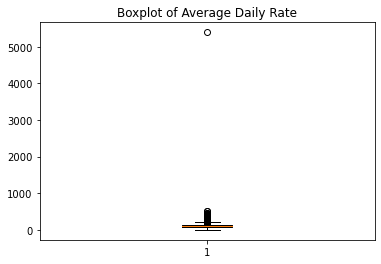

In [16]:
plt.boxplot(shg["Avg Daily Rate"])
plt.title("Boxplot of Average Daily Rate")

In [17]:
#transforming the oulier
#defining the IQR bounds 
Q1 = shg["Avg Daily Rate"].quantile(0.25)
Q3 = shg["Avg Daily Rate"].quantile(0.75)
IQR = Q3 - Q1

# Define upper and lower bounds
lower_bound = (Q1 - (1.5 * IQR))
upper_bound = (Q3 - (1.5 * IQR))

#capping outliers
shg["Avg Daily Rate"] = np.where(shg["Avg Daily Rate"] > upper_bound, upper_bound, shg["Avg Daily Rate"])
shg["Avg Daily Rate"] = np.where(shg["Avg Daily Rate"] < lower_bound, lower_bound, shg["Avg Daily Rate"])


#### Revenue

<function matplotlib.pyplot.show(close=None, block=None)>

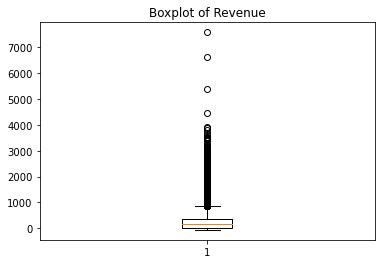

In [18]:
#checking for outliers in revenue column
plt.boxplot(shg["Revenue"])
plt.title("Boxplot of Revenue")
plt.show

In [19]:
#caping outliers
Q1 = shg["Revenue"].quantile(0.25)
Q3 = shg["Revenue"].quantile(0.75)
IQR = Q3 - Q1

lower_bound = (Q1 - (1.5 * IQR))
upper_bound = (Q3 + (1.5 * IQR))

shg["Revenue"] = np.where(shg["Revenue"] > upper_bound, upper_bound, shg["Revenue"])
shg["Revenue"] = np.where(shg["Revenue"] < lower_bound, lower_bound, shg["Revenue"])

#### Revenue loss

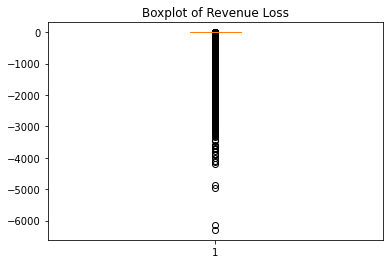

In [20]:
# checking outliers in revenue loss column
plt.boxplot(shg["Revenue Loss"])
plt.title("Boxplot of Revenue Loss")
plt.show()

In [21]:
#capping the outliers
#IQR bound
Q1 = shg["Revenue Loss"].quantile(0.25)
Q3 = shg["Revenue Loss"].quantile(0.75)
IQR = Q3 - Q1

#upper bound and lower bound
upper_bound = (Q3 - (1.5 * IQR))
lower_bound = (Q1 - (1.5 * IQR))

#capping outliers
shg["Revenue Loss"] = np.where(shg["Revenue Loss"] > upper_bound, upper_bound, shg["Revenue Loss"])
shg["Revenue Loss"] = np.where(shg["Revenue Loss"] < lower_bound, lower_bound, shg["Revenue Loss"]) 

{'whiskers': [<matplotlib.lines.Line2D at 0x216403130a0>,
 'caps': [<matplotlib.lines.Line2D at 0x21640313760>,
 'boxes': [<matplotlib.lines.Line2D at 0x21640775d00>],
 'medians': [<matplotlib.lines.Line2D at 0x21640313e20>],
 'fliers': [<matplotlib.lines.Line2D at 0x2163fcaa1c0>],
 'means': []}

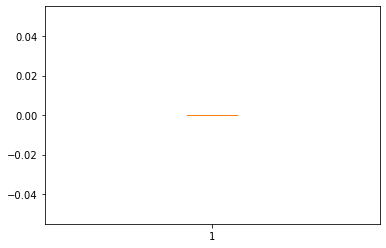

In [22]:
#confirming if outliers are gone
plt.boxplot(shg["Revenue Loss"])

####  Checking for Negative or Zero Values

In [23]:
# Check for non-positive values (<= 0) in each column
guests_invalid = shg[shg['Guests'] <= 0].sum()
nights_invalid = shg[shg['Nights'] <= 0].sum()
lead_time_invalid = shg[shg['Lead Time'] <= 0].sum()

# Display any invalid entries
print("Invalid 'Guests' entries:\n", guests_invalid)
print("Invalid 'Nights' entries:\n", nights_invalid)
print("Invalid 'Lead Time' entries:\n", lead_time_invalid)


Invalid 'Guests' entries:
 Booking ID                                                       15342034
Hotel                   ResortResortResortResortResortResortResortReso...
Lead Time                                                            7062
Nights                                                                814
Guests                                                                  0
Distribution Channel    CorporateCorporateOnline Travel AgentOnline Tr...
Customer Type           Transient-PartyTransientTransient-PartyTransie...
Country                 PortugalPortugalSpainPortugalPortugalPortugalP...
Deposit Type            No DepositNo DepositNo DepositNo DepositNo Dep...
Avg Daily Rate                                                    915.315
Status                  Check-OutCheck-OutCheck-OutCheck-OutCheck-OutC...
Cancelled (0/1)                                                        25
Revenue                                                           9348.18
Revenue Los

In [24]:
# Count of invalid (non-positive) values
invalid_guests_count = (shg['Guests'] < 0).sum()
invalid_nights_count = (shg['Nights'] < 0).sum()
invalid_lead_time_count = (shg['Lead Time'] < 0).sum()

print("Count of invalid 'Guests' entries:", invalid_guests_count)
print("Count of invalid 'Nights' entries:", invalid_nights_count)
print("Count of invalid 'Lead Time' entries:", invalid_lead_time_count)


Count of invalid 'Guests' entries: 0
Count of invalid 'Nights' entries: 0
Count of invalid 'Lead Time' entries: 0


#### Categorical Values

In [25]:
#Viewing count for hotel and the categories
hotel_count = shg["Hotel"].value_counts()
print(hotel_count)

City      79330
Resort    40060
Name: Hotel, dtype: int64


In [26]:
#Viewing counts for distribution channel
distribution_channel_count = shg["Distribution Channel"].value_counts()
print(distribution_channel_count)

Online Travel Agent     74072
Offline Travel Agent    23991
Direct                  14645
Corporate                6677
Undefined                   5
Name: Distribution Channel, dtype: int64


In [27]:
#viewing count for Customer type column
customer_type = shg["Customer Type"].value_counts()
print(customer_type)

Transient          89613
Transient-Party    25124
Contract            4076
Group                577
Name: Customer Type, dtype: int64


In [28]:
#Viewing count for deposit type
deposit_type = shg["Deposit Type"].value_counts()
print(deposit_type)

No Deposit        104641
Non Refundable     14587
Refundable           162
Name: Deposit Type, dtype: int64


### Objectives of the Analysis:

#### Booking Patterns:
- What is the trend in booking patterns over time, and are there specific seasons or
months with increased booking activity?
- How does lead time vary across different booking channels, and is there a correlation
between lead time and customer type?

In [29]:
#extracting month and year from booking date
shg["Booking Month"] = shg["Booking Date"].dt.month
shg["Booking Year"] = shg["Booking Date"].dt.year

#Grouping by month and year to get grouping count
monthly_booking = shg.groupby(["Booking Year", "Booking Month"]).size().reset_index(name = "Booking Count")
monthly_booking.head()

,Booking Year,Booking Month,Booking Count
0,2013,6,1
1,2014,3,1
2,2014,4,4
3,2014,6,2
4,2014,7,3


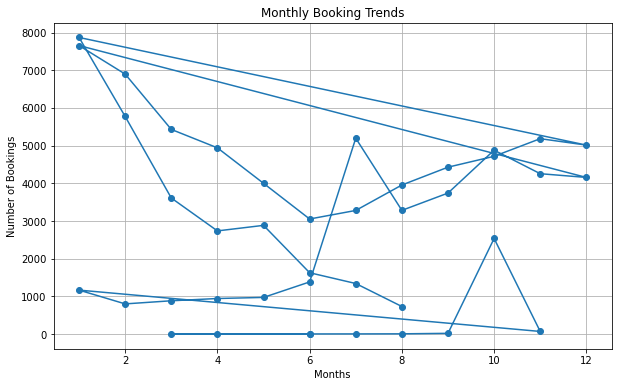

In [30]:
#visualizing the monthly_booking 
plt.figure(figsize=(10, 6))
plt.plot(monthly_booking["Booking Month"], monthly_booking["Booking Count"], marker = "o")
plt.title("Monthly Booking Trends")
plt.xlabel("Months")
plt.ylabel("Number of Bookings")
plt.grid()
plt.show()

From the graph we can see that:
- January has the highest booking count with a decrease in February
- There is no consistency and fluctuation of booking occurs throught the year
- Theres a steady increase towards the end of the year from October to december
- The months with the lowest booking count are be March, April, and possible the middle of the year

#### Distribution of Lead Time

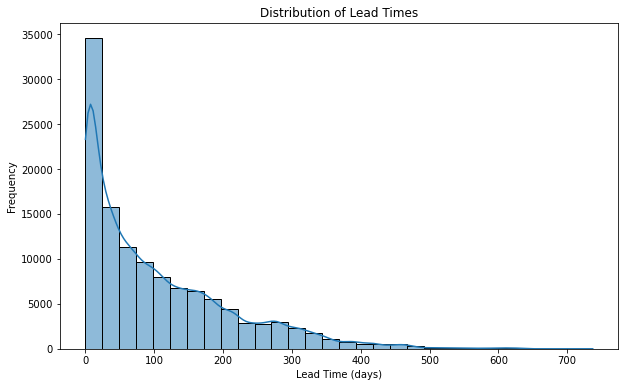

In [31]:
#importing required package
import seaborn as sns

#plotting distribution of lead time across all booking
plt.figure(figsize=(10, 6))
sns.histplot(shg["Lead Time"], bins =30, kde=True)
plt.title("Distribution of Lead Times")
plt.xlabel("Lead Time (days)")
plt.ylabel("Frequency")
plt.show()

###  Lead Time by Booking Channel


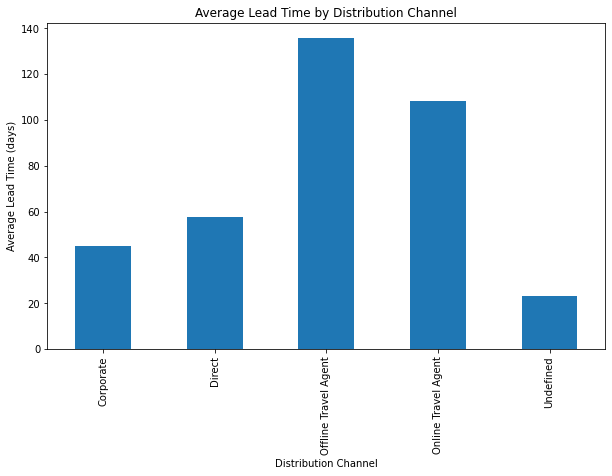

In [32]:
#calculating the mean booking time for each booking channel
channel_lead_time = shg.groupby("Distribution Channel")["Lead Time"].mean()

#ploting a bar graph
plt.figure(figsize=(10,6))
channel_lead_time.plot(kind= "bar")
plt.title("Average Lead Time by Distribution Channel")
plt.xlabel("Distribution Channel")
plt.ylabel("Average Lead Time (days)")
plt.show()

### Lead Time by Customer Type

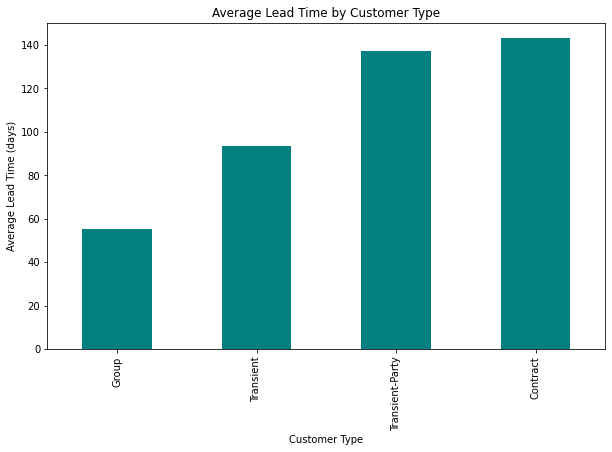

In [33]:
#calculating the mean booking time for each customer type
customer_lead_mean = shg.groupby("Customer Type")["Lead Time"].mean().sort_values()

#ploting a bar plot
plt.figure(figsize=(10,6))
customer_lead_mean.plot(kind="bar", color = "teal")
plt.title("Average Lead Time by Customer Type")
plt.xlabel("Customer Type")
plt.ylabel("Average Lead Time (days)")
plt.show()

### Correlation between Lead Time and Customer type

In [34]:
from sklearn.preprocessing import LabelEncoder

# Encode 'Customer Type' as numerical values
label_encoder = LabelEncoder()
shg['Customer Type Encoded'] = label_encoder.fit_transform(shg['Customer Type'])

# Calculate the correlation between 'Lead Time' and 'Customer Type Encoded'
correlation = shg[['Lead Time', 'Customer Type Encoded']].corr().iloc[0, 1]
print("Correlation between Lead Time and Customer Type:", correlation)


Correlation between Lead Time and Customer Type: 0.0734027444847653


- The correlation is weak 
- This indicates that lead time doesn't vary much in relation to customer type

#### Customer Behavior Analysis:
- Which distribution channels contribute the most to bookings, and how does the average
daily rate (ADR) differ across these channels?
- Can we identify any patterns in the distribution of guests based on their country of origin,
and how does this impact revenue?

In [37]:
#count of booking by distribution channels 
channel_booking = shg["Distribution Channel"].value_counts()

#the ADR for each distribution channel
channel_adr = shg.groupby("Distribution Channel")["Avg Daily Rate"].mean()

print("Number of Bookings by Distribution Channel:")
print(channel_booking)

print("\nAverage Daily Rate (ADR) by Distribution Channel:")
print(channel_adr)

Number of Bookings by Distribution Channel:
Online Travel Agent     74072
Offline Travel Agent    23991
Direct                  14645
Corporate                6677
Undefined                   5
Name: Distribution Channel, dtype: int64

Average Daily Rate (ADR) by Distribution Channel:
Distribution Channel
Corporate               38.495389
Direct                  38.225008
Offline Travel Agent    39.767940
Online Travel Agent     40.400636
Undefined               24.774000
Name: Avg Daily Rate, dtype: float64


##### Country Analysis

In [42]:
#count of booking by country
country_booking = shg["Country"].value_counts().sort_values(ascending=False)

#Total revenue by country
country_revenue = shg.groupby("Country")["Revenue"].sum().sort_values(ascending=False)

print("Number of booking distribution by country:")
print(country_booking.head())

print("\nTotal revenue by country:")
print(country_revenue.head())


Number of booking distribution by country:
Portugal          49078
United Kingdom    12129
France            10415
Spain              8568
Germany            7287
Name: Country, dtype: int64

Total revenue by country:
Country
Portugal          8.451071e+06
United Kingdom    3.839125e+06
France            2.936324e+06
Spain             2.076319e+06
Germany           1.994160e+06
Name: Revenue, dtype: float64


### Cancellation Analysis:
- What factors are most strongly correlated with cancellations, and can we predict
potential cancellations based on certain variables?
- How does the revenue loss from cancellations compare across different customer
segments and distribution channels?

#### Correlation Analysis

In [46]:
#correlation analysis with cancellation status
cancellation_corr = shg.corr()["Cancelled (0/1)"].sort_values(ascending=False)

print("Correlation of various factors with cancelation:")
print(cancellation_corr)

Correlation of various factors with cancelation:
Cancelled (0/1)          1.000000
Calc Lead Time           0.293123
Lead Time                0.293123
Avg Daily Rate           0.077192
Booking Month            0.050502
Guests                   0.046522
Nights                   0.017779
Customer Type Encoded   -0.068140
Booking Year            -0.114481
Booking ID              -0.242238
Revenue                 -0.489526
Revenue Loss                  NaN
Name: Cancelled (0/1), dtype: float64


### Predicting Potential Cancellations with Logistic Regression 

In [50]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score

# Selected relevant features for prediction
features = ["Lead Time", "Avg Daily Rate", "Guests"] 
X = shg[features]
y = shg["Cancelled (0/1)"]

# Spliting data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train logistic regression model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Predict cancellations
y_pred = model.predict(X_test)

# Print model performance
print("Model Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Model Accuracy: 0.6578998799452774

Classification Report:
              precision    recall  f1-score   support

       False       0.67      0.88      0.76     22478
        True       0.58      0.28      0.38     13339

    accuracy                           0.66     35817
   macro avg       0.63      0.58      0.57     35817
weighted avg       0.64      0.66      0.62     35817



For bookings that are not canceled (False class):
- The model has an accuracy of 65.8%, which means it correctly predicts whether a booking is canceled or not about 66% of the time.
- Precision: 0.67 - Of all predictions where the model said there was no cancellation, 67% were correct.
- Recall: 0.88 - The model correctly identified 88% of actual non-cancellations.
- F1-score: 0.76 - Balancing precision and recall, this is fairly strong

For canceled bookings (True class):
- Precision: 0.58 - Of all predictions where the model said there was cancellation, 58% were correct.
- Recall: 0.28 - The model correctly identified 28% of the actual canceletion, 
  suggesting a high number of false negatives.
- F1-score: 0.38 - This lower score reflects challenges in accurately identifying cancellations.

Weighted Average:
- F1-score: 0.62 - The weighted F1 score indicates the model has room for improvement, especially in predicting          
  cancellations.